In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/5
100/100 [==============================] - 14s 134ms/step - loss: 0.5250 - accuracy: 0.7546
Epoch 2/5
100/100 [==============================] - 14s 136ms/step - loss: 0.3908 - accuracy: 0.8365
Epoch 3/5
100/100 [==============================] - 13s 134ms/step - loss: 0.3222 - accuracy: 0.8603
Epoch 4/5
100/100 [==============================] - 13s 134ms/step - loss: 0.2816 - accuracy: 0.8846
Epoch 5/5
63/63 [==============================] - 1s 13ms/step - loss: 0.2245 - accuracy: 0.9085
Test accuracy: 0.9085000157356262
313/313 [==============================] - 5s 16ms/step - loss: 0.2228 - accuracy: 0.9115
Test accuracy: 0.9114999771118164


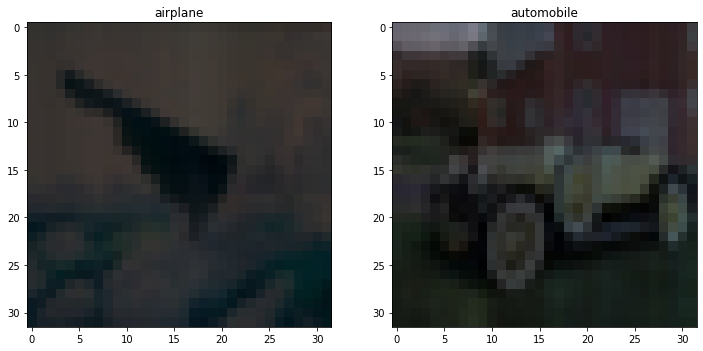

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the number of classes and images
num_classes = 2
num_images = 7000

# Load the CIFAR-10 dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()

# Filter the dataset to only include two classes
class_indices = [0, 1]  # 'airplane' and 'automobile'
x_train = []
y_train = []
x_test = []
y_test = []

for i in range(len(y_train_all)):
    if y_train_all[i] in class_indices:
        x_train.append(x_train_all[i])
        y_train.append(y_train_all[i])

for i in range(len(y_test_all)):
    if y_test_all[i] in class_indices:
        x_test.append(x_test_all[i])
        y_test.append(y_test_all[i])

# Convert the lists to numpy arrays
x_train = tf.keras.utils.normalize(np.array(x_train), axis=1)
x_test = tf.keras.utils.normalize(np.array(x_test), axis=1)

# Convert the labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=100)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
#Evaluate train data
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Train accuracy:', train_acc)

# Plot some examples of the two classes
class_labels = ['airplane', 'automobile']
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.choice(np.where(y_train[:,i]==1)[0])  # pick a random example from the i-th class
    ax.imshow(x_train[idx])
    ax.set_title(class_labels[i])

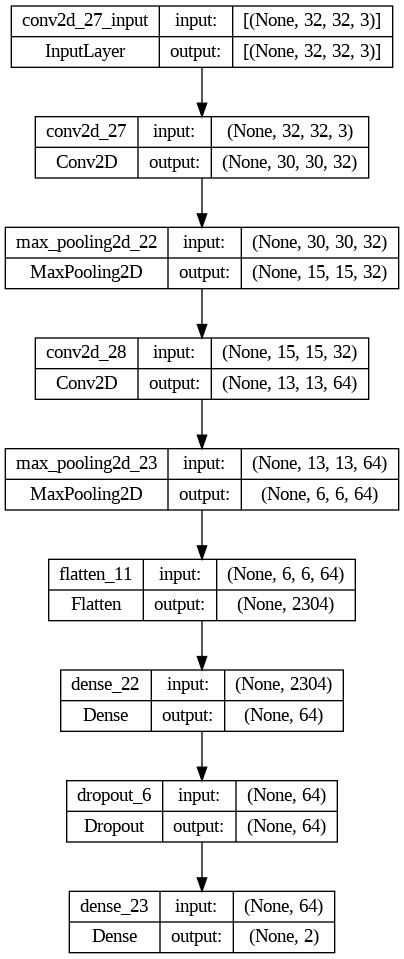

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
# from tensorflow.keras.utils import plot_model
# import matplotlib.pyplot as plt

# # Define the model architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# # Plot the model architecture
# # plot_model(model, to_file='model.png', show_shapes=True, dpi=96, figsize=(8, 6))
# plot_model(model, to_file='model.png', show_shapes=True, dpi=250)

# # Show the image
# img = plt.imread('model.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(horizontal_flip=True)

In [ ]:
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import plot_model
# from PIL import Image

# # Plot the model architecture
# plot_model(model, to_file='model.png', show_shapes=True, dpi=96)
# img = Image.open('model.png')
# width, height = img.size
# new_width, new_height = width * 4.5, height * 5.5
# img = img.resize((int(new_width), int(new_height)))
# img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
# img.save('model_reshaped.png')

# # Show the image
# img = plt.imread('model_reshaped.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.utils import plot_model

# # Define the model architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# # Plot the model architecture
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# # from PIL import Image

# # # Open the image and flip it horizontally
# # image = Image.open('model.png')
# # flipped_image = image.transpose(method=Image.FLIP_LEFT_RIGHT)

# # # Save the flipped image
# # flipped_image.save('model_flipped.png')



63/63 [==============================] - 1s 15ms/step


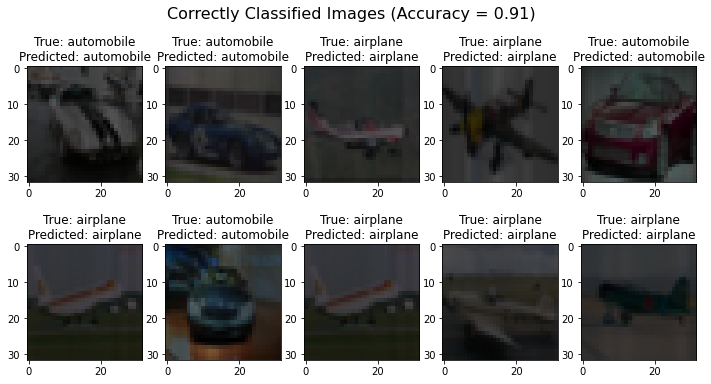

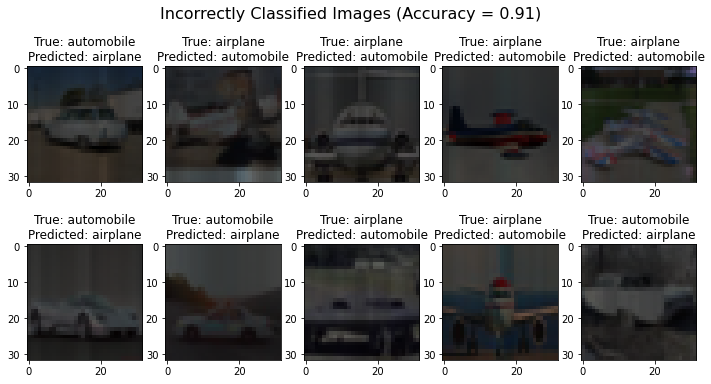

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Find indices of images that were classified correctly and incorrectly
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

# Display 10 random images that were classified correctly
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.choice(correct_indices)  # pick a random correctly classified example
    ax.imshow(x_test[idx])
    ax.set_title(f"True: {class_labels[y_test_classes[idx]]}\nPredicted: {class_labels[y_pred_classes[idx]]}")
plt.suptitle(f"Correctly Classified Images (Accuracy = {test_acc:.2f})", fontsize=16)

# Display 10 random images that were classified incorrectly
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.choice(incorrect_indices)  # pick a random incorrectly classified example
    ax.imshow(x_test[idx])
    ax.set_title(f"True: {class_labels[y_test_classes[idx]]}\nPredicted: {class_labels[y_pred_classes[idx]]}")
plt.suptitle(f"Incorrectly Classified Images (Accuracy = {test_acc:.2f})", fontsize=16)

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print('Test accuracy:', test_acc)


Test accuracy: 0.9139999747276306


In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print('Validation accuracy:', val_acc)


62/62 [==============================] - 1s 14ms/step - loss: 0.2192 - accuracy: 0.9071
Validation accuracy: 0.9071065783500671


Epoch 1/5
100/100 [==============================] - 14s 140ms/step - loss: 0.1999 - accuracy: 0.9188 - val_loss: 0.1728 - val_accuracy: 0.9299
Epoch 2/5
100/100 [==============================] - 15s 153ms/step - loss: 0.1703 - accuracy: 0.9339 - val_loss: 0.1596 - val_accuracy: 0.9340
Epoch 3/5
100/100 [==============================] - 15s 149ms/step - loss: 0.1586 - accuracy: 0.9385 - val_loss: 0.1488 - val_accuracy: 0.9401
Epoch 4/5
100/100 [==============================] - 14s 142ms/step - loss: 0.1500 - accuracy: 0.9422 - val_loss: 0.1376 - val_accuracy: 0.9482
Epoch 5/5
100/100 [==============================] - 15s 146ms/step - loss: 0.1433 - accuracy: 0.9454 - val_loss: 0.1306 - val_accuracy: 0.9497


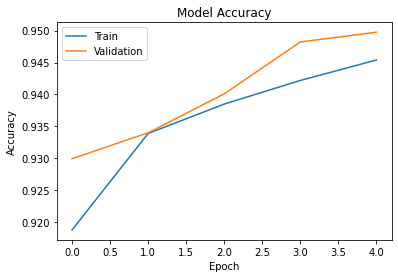

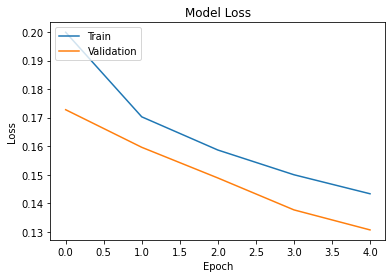

In [ ]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()